---

# Predictive Car Price Model

---

<p>In this jupyter notebook I will develop predictive car price model that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p>

(The data exploration and normalization has been already done in "Car_Data_Exploratory_Analysis" file.) 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h4>Lets load the modules for linear regression</h4>

In [4]:
from sklearn.linear_model import LinearRegression

<h4>Create the linear regression object</h4>

In [6]:
lm = LinearRegression()

For this example, we want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [7]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [14]:
lm.intercept_

38423.3058581574

In [15]:
lm.coef_


array([-821.73337832])

<h3>What is the final estimated linear model we get?</h3>
As we saw above, we should get a final linear model with the structure:
    $$
Yhat = a + b  X
$$
Plugging in the actual values we get:
    

<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>

<h4>Multiple Linear Regression</h4>

<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>

The equation is given by

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.

In [14]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [22]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
lm.intercept_

-15806.624626329209

In [24]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

So the linear function we get is:
    

<b>Price</b> = -15806.624626329209 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>

Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.

In [25]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

Let's visualize **highway-mpg** as potential predictor variable of price:

(0.0, 48262.33837567369)

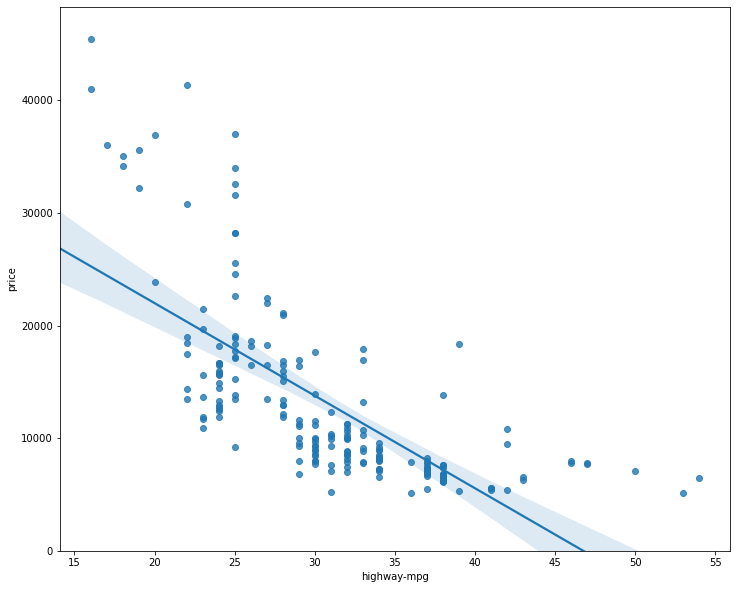

In [26]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

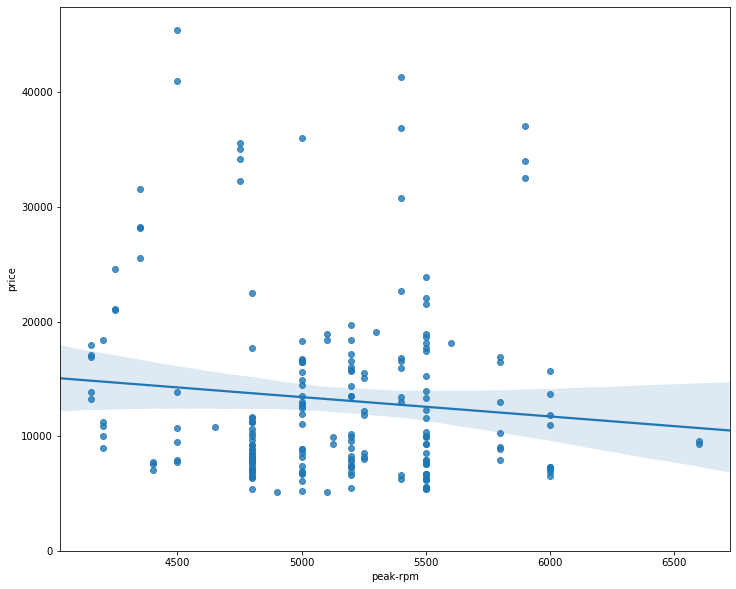

In [27]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.</p>

<h4>Residual Plot<h4>

A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

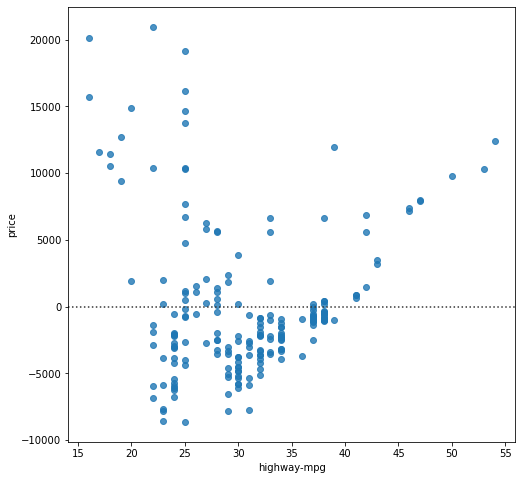

In [29]:
width = 8
height = 8
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

One way to look at the fit of the non-linear model(Multiple regression mdel) is by looking at the <b>distribution plot</b>: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

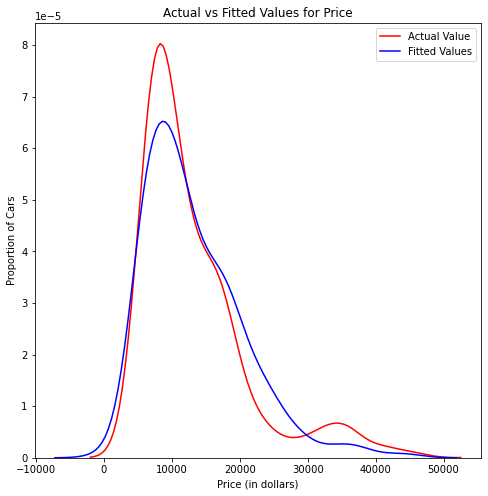

In [30]:
Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement

<h2> Polynomial Regression </h2>

<p>We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>

<p>We will use the following function to plot the data:</p>

In [20]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()

In [21]:
x = df['highway-mpg']
y = df['price']

In [22]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Let's plot the function

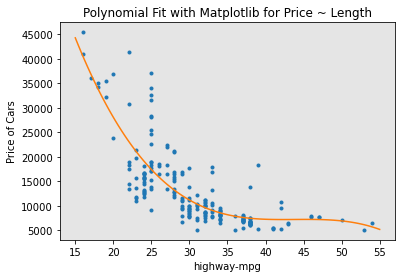

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [35]:
PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x, y, 3)

<h2> Measures for In-Sample Evaluation</h2>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

Now calculate R-squared and Mean Square Error for all models

<h5>Simple Linear Regression<h5>

In [8]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [9]:
from sklearn.metrics import mean_squared_error

In [11]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [12]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


<h3> Multiple Linear Regression</h3>

In [15]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [17]:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3> Polynomial Fit</h3>

In [18]:
from sklearn.metrics import r2_score

In [23]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906517


In [24]:
mean_squared_error(df['price'], p(x))

20474146.426361226

# CONCLUSION

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<p>Comparing above three models, <b>the MLR(multiple linear regression) model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>


**Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg**